<a href="https://colab.research.google.com/github/GermanOmar/Wear/blob/master/Wear_HV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Microhardness prediction and wear ranges in samples manufactured by laser powder bed fusion

<a href="https://ibb.co/5Rvr5t7"><img src="https://i.ibb.co/kS04hkd/Fig1-4.png" WIDTH="500" HEIGHT="300"  border="0"></a>

 Libraries

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install lazypredict
warnings.filterwarnings("ignore")

     |████████████████████████████████| 1.2MB 29.8MB/s 
     |████████████████████████████████| 14.5MB 199kB/s 
     |████████████████████████████████| 25.9MB 90kB/s 
     |████████████████████████████████| 81kB 10.7MB/s 
     |████████████████████████████████| 10.1MB 39.5MB/s 
     |████████████████████████████████| 276kB 45.1MB/s 
     |████████████████████████████████| 6.8MB 26.0MB/s 
     |████████████████████████████████| 127.6MB 32kB/s 
     |████████████████████████████████| 307kB 43.9MB/s 
     |████████████████████████████████| 256kB 50.6MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=54c3c748147ce9e35de2d884aec3ceb4c2a40a283c3e89c5baea19df6f7d5c63
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.19.1 which is incompatible.
ERROR: google-colab 1.0.0 has requiremen

Randomized search

In [1]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler

 Upload database:

In [2]:
!git clone https://github.com/GermanOmar/Wear

Cloning into 'Wear'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.


In [20]:
#Experimental data
data = pd.read_table('HV.txt') 
data.describe()


,P,S,L,D,HV
count,74.00,74.00,74.00,74.00,74.00
mean,194.80,832.32,45.74,5.55,382.13
std,125.17,843.96,8.90,2.28,233.34
min,25.00,55.60,20.00,2.34,45.90
25%,100.00,250.00,50.00,2.59,173.05
50%,150.00,500.00,50.00,5.17,376.40
75%,278.75,1000.00,50.00,7.80,514.50
max,800.00,5000.00,50.00,8.01,980.30



Setting inputs - output:

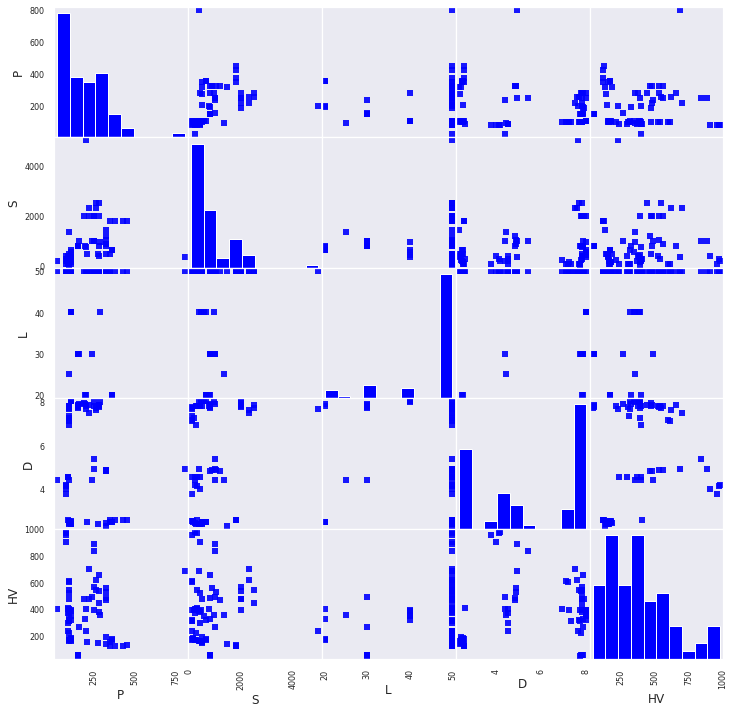

In [21]:
from pandas.plotting import scatter_matrix
#DISPLAY MATRIX - identificar correlacion entre variables
import seaborn as sns
sns.set()

plt.rcParams["axes.grid"] = False

#pd.tools.plotting.scatter_matrix(df, alpha=0.2, c='red', hist_kwds={'color':['burlywood']})

#scatter_matrix(data, alpha=0.2, marker='s', figsize = (12,12), color = 'blue')
scatter_matrix(data, alpha=0.9,marker='s', figsize = (12,12),  c='blue', hist_kwds={'color':['blue']})

warnings.filterwarnings("ignore")

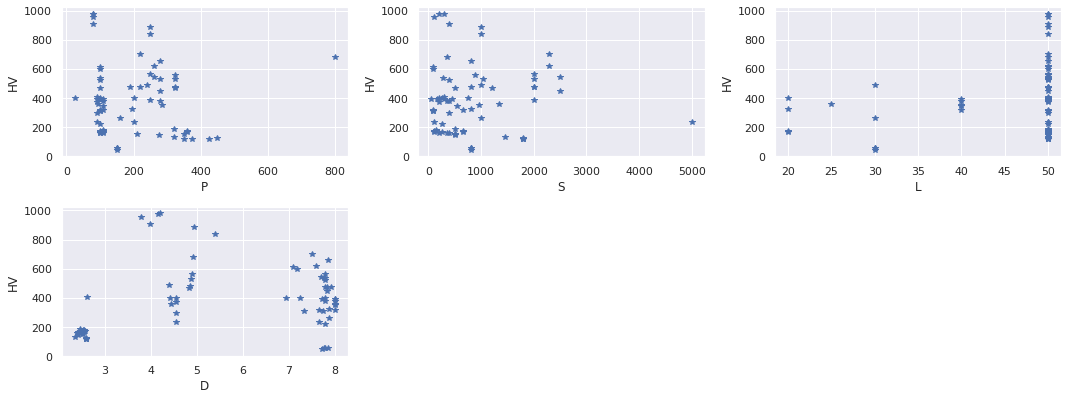

In [22]:
#fields = ['P', 'S', 'L',  'HD1',  'F', 'd' ]
fields = ['P', 'S', 'L',  'D'  ]
import seaborn as sns
sns.set()

fig = plt.figure()
fig.set_size_inches((15,8))
for i, field in enumerate(fields):
  plt.subplot(3, 3, i + 1)
  plt.plot(data[field], data['HV'], 'b*')
  plt.xlabel(field)
  plt.ylabel('HV')

plt.tight_layout()

In [23]:
#X=data[['P', 'S', 'L',  'HD1',  'F', 'd' ]]
X=data[['P', 'S', 'L',  'D']]
Y=data['HV'][:,None]

# Wear rate prediction

 Split data

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print('training samples:', X_train.shape[0],  ' test samples:', X_test.shape[0])

training samples: 59  test samples: 15


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#y_train = scaler.fit_transform(y_train)
#y_test = scaler.transform(y_test)


#Results:

In [11]:
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle

In [27]:
from sklearn.metrics import mean_absolute_error as MAE
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [00:01<00:00, 31.26it/s]

                               Adjusted R-Squared  ...  Time Taken
Model                                              ...            
DecisionTreeRegressor                        0.93  ...        0.01
GradientBoostingRegressor                    0.92  ...        0.05
XGBRegressor                                 0.90  ...        0.03
ExtraTreesRegressor                          0.87  ...        0.10
AdaBoostRegressor                            0.84  ...        0.07
RandomForestRegressor                        0.84  ...        0.19
BaggingRegressor                             0.79  ...        0.03
KNeighborsRegressor                          0.42  ...        0.01
PoissonRegressor                            -0.04  ...        0.01
HuberRegressor                              -0.05  ...        0.02
OrthogonalMatchingPursuitCV                 -0.06  ...        0.02
SGDRegressor                                -0.06  ...        0.01
LassoLarsCV                                 -0.06  ...        

# XGB

In [28]:
import pickle
import xgboost as xgb

xgbr = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

In [29]:
score = xgbr.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.9999999999273709


-XGBRegressor -
------------------
MSE test: 2217.8450288333206

R2:  0.95566069822428
RMSE:  47.09400204732361
MAE:  32.91942759195963
IM:  57.458991531258846



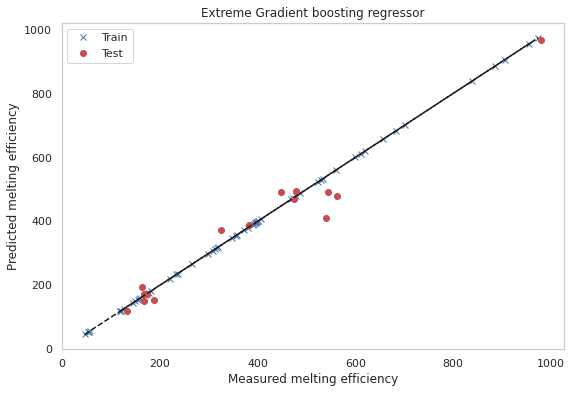

In [30]:
print("-XGBRegressor -")
print("------------------")
y_star_train = xgbr.predict(X_train)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

#Plots
sns.set_theme(style="whitegrid")
plt.rcParams["axes.grid"] = False
fig = plt.figure()
fig.set_size_inches((9,6))
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})

plt.plot(y_train, y_star_train, 'bx', label = 'Train')
plt.plot([y_star_train.min(), y_star_train.max()], [y_star_train.min(), y_star_train.max()], 'k--')
plt.plot(y_test, y_pred, 'ro', label = 'Test')
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--')
plt.legend()
plt.ylabel('Predicted melting efficiency')
plt.xlabel('Measured melting efficiency')
plt.title("Extreme Gradient boosting regressor")

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

In [ ]:
# initialize model and define the space of the hyperparameters to
# perform the grid-search over
model = xgbr
n_estimators = [10, 100, 1000, 10000]
learning_rate = [0.1, 0.01, 1e-3]
max_depth = [5, 20, 50, 100]
reg_lambda = [0.001, 0.01, 0.1, 1, 10]


grid = dict(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth )

In [ ]:
# initialize a cross-validation fold and perform a randomized-search
# to tune the hyperparameters
print("[INFO] grid searching over the hyperparameters...")
cvFold = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
randomSearch = RandomizedSearchCV(estimator=model, n_jobs=-1,
	cv=cvFold, param_distributions=grid,
	scoring="neg_mean_squared_error")
searchResults = randomSearch.fit(X_train, y_train)
# extract the best model and evaluate it
print("[INFO] evaluating...")
bestModel = searchResults.best_estimator_
print("R2: {:.2f}".format(bestModel.score(X_test, y_test)))
print(bestModel)

[INFO] grid searching over the hyperparameters...
[INFO] evaluating...
R2: 0.18
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=20,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
             objective='reg:linear', random_state=1234, reg_alpha=0,
             reg_lambda=0.1, scale_pos_weight=1, seed=1234, silent=None,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=0)


In [31]:
# get importance

importance = xgbr.feature_importances_
# summarize feature importance

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance


Feature: 0, Score: 0.11160
Feature: 1, Score: 0.03447
Feature: 2, Score: 0.54210
Feature: 3, Score: 0.31183


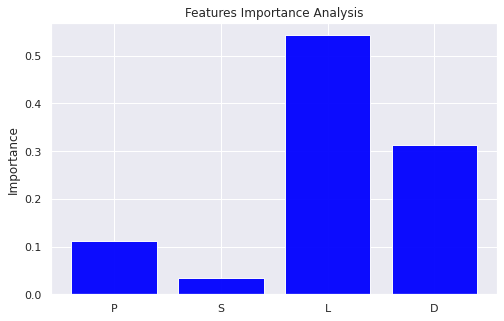

In [32]:
# Create lists for the plot
import seaborn as sns
sns.set()

#plt.rcParams["axes.grid"] = False

labels = ['P', 'S', 'L',  'D' ]
x_pos = np.arange(len(labels))


fig, ax = plt.subplots()
fig.set_size_inches((8,5))

ax.bar(x_pos, importance, align='center', alpha=0.95, color='blue')
ax.set_ylabel('Importance')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Features Importance Analysis')
ax.yaxis.grid(True)


#GBR

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
#KERNEL
#GBR=GradientBoostingRegressor(n_estimators=100, random_state=0)
GBR=GradientBoostingRegressor(n_estimators=5000, random_state=42, learning_rate=0.1 )

#START TRAINING
GBR.fit(X_train, y_train)
#PREDICTION
y_pred=GBR.predict(X_test)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

 
print("-Gradient boosting regressor-")
print("-----------------------------")

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()


-Gradient boosting regressor-
-----------------------------
MSE test: 1772.5737739936549

R2:  0.9645625900533836
RMSE:  42.101945014377364
MAE:  34.015177971821906
IM:  54.125847450718005



In [34]:
from sklearn.ensemble import AdaBoostRegressor

print(" AdaBoost -")
print("------------------")

Ada = AdaBoostRegressor(random_state=32, n_estimators=1000)
#START TRAINING
Ada.fit(X_train,y_train)
#PREDICTION
y_pred=Ada.predict(X_test)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

 AdaBoost -
------------------
MSE test: 6813.532756680215

R2:  0.8637834108652224
RMSE:  82.54412611858106
MAE:  70.83137247784424
IM:  108.76872086558011



## Comparisson

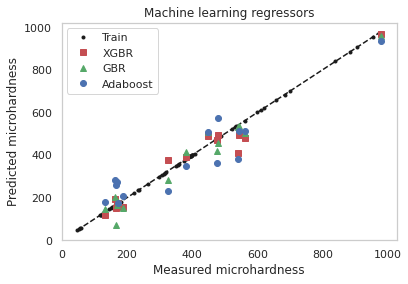

In [38]:
import seaborn as sns
sns.set()


y1=xgbr.predict(X_test)
y2=GBR.predict(X_test)
y3=Ada.predict(X_test)

#Plots
sns.set_theme(style="whitegrid")
plt.rcParams["axes.grid"] = False
fig = plt.figure()
#fig.set_size_inches((9,6))
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})

plt.plot(y_train, y_star_train, 'k.', label = 'Train')
plt.plot([y_star_train.min(), y_star_train.max()], [y_star_train.min(), y_star_train.max()], 'k--')
plt.plot(y_test, y1, 'rs', label = 'XGBR')
plt.plot(y_test, y2, 'g^', label = 'GBR')
plt.plot(y_test, y3, 'bo', label = 'Adaboost')

plt.legend()
plt.ylabel('Predicted microhardness')
plt.xlabel('Measured microhardness')
plt.title("Machine learning regressors")
print()

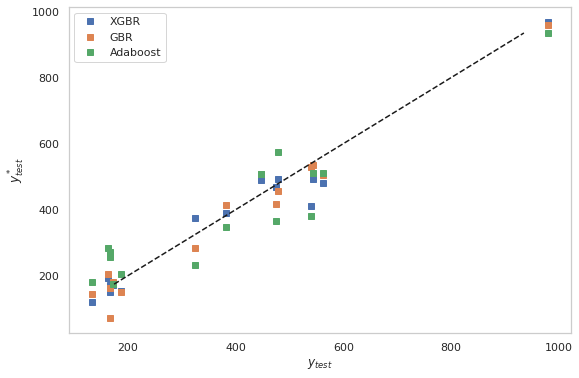

In [39]:
models = [ xgbr,  GBR, Ada]
labels = ['XGBR',  'GBR', 'Adaboost']

fig = plt.figure()
fig.set_size_inches((9,6))

for mod, label in zip( models, labels): 
  y_pred = mod.predict(X_test)
  plt.plot(y_test, y_pred, 's' ,label = label)

plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--')
plt.ylabel('$y^*_{test}$')
plt.xlabel('$y_{test}$')
plt.legend()  
  

CROSS-VALIDATION

In [41]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import cross_val_score as CV

import warnings
warnings.filterwarnings('ignore')

models = [ xgbr,  GBR, Ada]
labels = ['XGBR',  'GBR', 'Adaboost']
IMS = []

print("--------------------------------------------------------------")
print("%5s | %5s | %5s | %5s | %5s " % ("ML algorithm",  "CV-R2", "CV-MSE", "CV-MAE", "IM"))
print("--------------------------------------------------------------")

for mod, label in zip( models, labels): 
  #y_star = mod.predict(X)
 
  scoreR2 = CV(mod, X_train, y_train, cv=5, scoring='r2')
  #print(-1*scoreR2)
  scoreMSE = CV(mod, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  #print(-1*scoreMSE)
  scoreMAE = CV(mod, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
  #print(-1*scoreMAE)
  IM=np.sqrt(((1-scoreR2)**2) + (scoreMSE) + (scoreMAE**2) )
  #print("IM: ", IM)
  
 
  print("%15s | %.4f | %.4f | %.4f | %.4f " % (label,  scoreR2.mean(), -1*scoreMSE.mean(), -1*scoreMAE.mean() , np.sqrt(((1-scoreR2.mean())**2) + (-1*scoreMSE.mean()) + (scoreMAE.mean()**2) )))
print("--------------------------------------------------------------")

--------------------------------------------------------------
ML algorithm | CV-R2 | CV-MSE | CV-MAE |    IM 
--------------------------------------------------------------
           XGBR | 0.4712 | 24569.3231 | 104.6725 | 188.4832 
            GBR | 0.4588 | 23897.8205 | 109.7055 | 189.5611 
       Adaboost | 0.5877 | 18890.3834 | 102.3389 | 171.3587 
--------------------------------------------------------------


Results:

In [42]:
R_GP=np.array(Ada.predict(X_test))
R_XGB=np.array(xgbr.predict(X_test))
R_MLP=np.array(GBR.predict(X_test))

In [ ]:
R_GP.shape

(11, 1)

In [43]:
R1_m=np.mean(R_GP*100)
R2_m=np.mean(R_XGB*100)
R3_m=np.mean(R_MLP*100)

In [ ]:
R3_m


282.7025881727001

In [44]:
R1_sd=np.std(R_GP*100)
R2_sd=np.std(R_XGB*100)
R3_sd=np.std(R_MLP*100)

In [ ]:
R3_sd

346.29271438757877

In [45]:
# Create lists for the plot
labels = ['Adaboost', 'XGBR', 'GBR']
x_pos = np.arange(len(labels))
CTEs = [R1_m, R2_m, R3_m]
error = [R1_sd, R2_sd, R3_sd ]

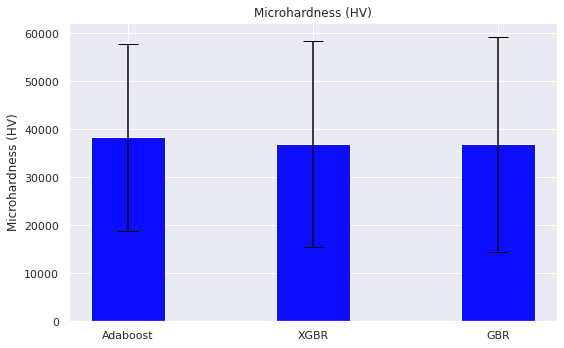

In [46]:
# Build the plot
import seaborn as sns
sns.set()


fig, ax = plt.subplots()
fig.set_size_inches((8,5))
width = [0.4,0.4, 0.4]

ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.95, ecolor='black', capsize=10, width=width, color='blue')
ax.set_ylabel('Microhardness (HV)')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Microhardness (HV)')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()